<a href="https://colab.research.google.com/github/vaishnavi17398/FeynnLabsInternship/blob/main/MarketSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
df = pd.read_csv('2-wheeler-EV-bikewale.csv')

In [ ]:
def clean_text(text):
    if isinstance(text, str):  # Check if the input is a string
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = text.lower()  # Convert text to lowercase
        tokens = word_tokenize(text)  # Tokenize text
        tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize words
        return ' '.join(tokens)
    else:
        return ''  # Return empty string if input is not a string


In [ ]:
# Clean and preprocess the 'review' column
df['clean_review'] = df['review'].apply(clean_text)

In [ ]:
# Check the data types of columns in the dataframe
print(df.dtypes)

review                 object
Used it for            object
Owned for              object
Ridden for             object
rating                  int64
Visual Appeal         float64
Reliability           float64
Performance           float64
Service Experience    float64
Extra Features        float64
Comfort               float64
Maintenance cost      float64
Value for Money       float64
Model Name             object
dtype: object


In [ ]:
#proceeding with customer segmentation using TF-IDF vectorization followed by KMeans clustering.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_review'])


In [ ]:
# Determine the optimal number of clusters using silhouette score
max_clusters = 10
best_score = -1
best_k = 2
for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    if score > best_score:
        best_score = score
        best_k = k

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
# Perform KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Display the clusters
print(df[['clean_review', 'cluster']])

                                          clean_review  cluster
0    checked bike capacity 150 km 1 full charge giv...        1
1    performance poor bike charging problem big thi...        0
2    purchased april 2022 sale staff clueless new v...        1
3    issue come scooty part available service centr...        0
4    dont buy vehicle unless near tv iqube service ...        0
..                                                 ...      ...
839  scooty ok 250 motor power le scooter power one...        1
840  superb scooty good look many color option le s...        1
841  2 year condition good 2 year scooter stopped m...        0
842  compare scooter best bike comfortable seat dri...        1
843  bike good segment use person aged 12 plus spee...        1

[844 rows x 2 columns]


In [ ]:
#performing some analysis on the clustered data.

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
# Function to get the most common words in a cluster
def get_most_common_words(cluster_id, n_words=10):
    cluster_reviews = df[df['cluster'] == cluster_id]['clean_review']
    all_words = ' '.join(cluster_reviews).split()
    word_counts = Counter(all_words)
    return word_counts.most_common(n_words)

In [ ]:
# Function to plot the most common words in each cluster
def plot_most_common_words(cluster_id):
    word_freq = get_most_common_words(cluster_id)
    words, frequencies = zip(*word_freq)
    plt.figure(figsize=(10, 6))
    plt.barh(words, frequencies, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.title(f'Most Common Words in Cluster {cluster_id}')
    plt.gca().invert_yaxis()
    plt.show()

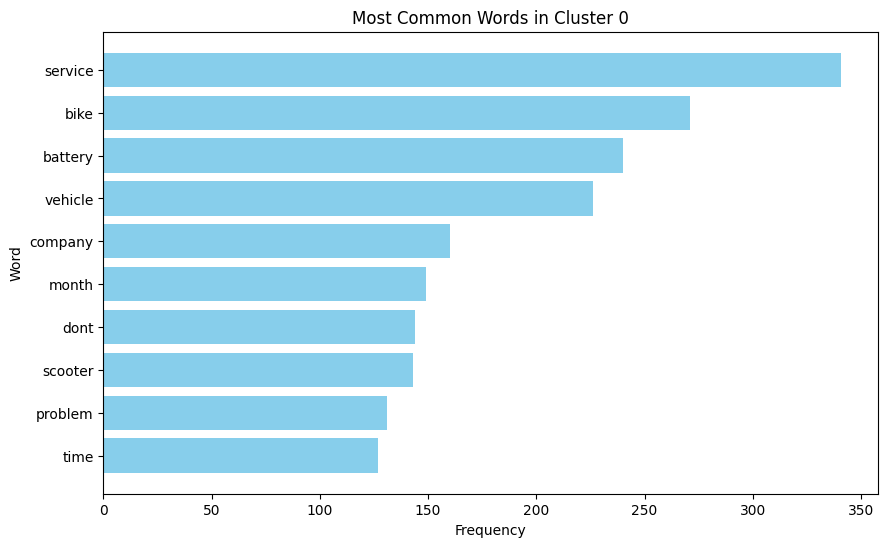

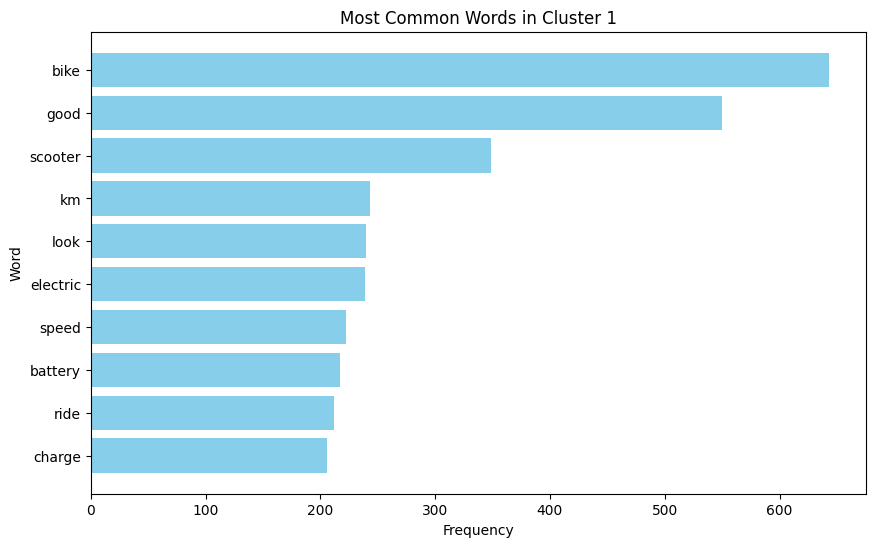

In [ ]:
# Plot the most common words in each cluster
for cluster_id in range(best_k):
    plot_most_common_words(cluster_id)

In [ ]:
# Summary statistics for each cluster
cluster_stats = df.groupby('cluster').agg({
    'rating': ['mean', 'median'],
    'Visual Appeal': ['mean', 'median'],
    'Reliability': ['mean', 'median'],
    'Performance': ['mean', 'median'],
    'Service Experience': ['mean', 'median'],
    'Extra Features': ['mean', 'median'],
    'Comfort': ['mean', 'median'],
    'Maintenance cost': ['mean', 'median'],
    'Value for Money': ['mean', 'median']
})
print(cluster_stats)

           rating        Visual Appeal        Reliability        Performance  \
             mean median          mean median        mean median        mean   
cluster                                                                        
0        1.551237    1.0      2.662551    3.0    1.726141    1.0    2.110169   
1        4.278075    5.0      4.326613    5.0    4.120000    4.0    4.264317   

               Service Experience        Extra Features          Comfort  \
        median               mean median           mean median      mean   
cluster                                                                    
0          2.0           1.514286    1.0       1.693182    1.0  2.308219   
1          5.0           4.017467    4.0       4.061856    4.0  4.179688   

               Maintenance cost        Value for Money         
        median             mean median            mean median  
cluster                                                        
0          2.0         2.4

Conclusions :



Rating:

Cluster 0 has significantly lower mean and median ratings compared to Cluster 1. This suggests that customers in Cluster 0 generally rated their experience lower across various aspects.
Visual Appeal, Reliability, Performance, Service Experience, Extra Features, Comfort, Maintenance Cost, Value for Money:

For all these aspects, Cluster 1 consistently has higher mean and median ratings compared to Cluster 0.
Cluster 1 generally perceives the product more positively across these aspects compared to Cluster 0.
Notably, the difference in ratings is most pronounced in Visual Appeal, Reliability, and Value for Money, where Cluster 1 has substantially higher ratings.



By segmenting customers based on their reviews, the EV startup can gain a deeper understanding of customer preferences and priorities.

Summary : Data Collection:

Data Preprocessing: I cleaned and preprocessed the text data by removing punctuation, converting text to lowercase, tokenizing, removing stopwords, and lemmatizing. This prepared the textual reviews for further analysis.

Customer Segmentation: Using machine learning techniques such as TF-IDF vectorization and KMeans clustering, I segmented customers based on their reviews into distinct clusters to identify different customer segments with unique preferences and perceptions of the product.

Analysis of Clusters: I analyzed the summary statistics for each cluster, comparing mean and median ratings across various aspects of the product. This provided insights into differences in customer perceptions and preferences between the clusters.